In [215]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

In [335]:
raw_df = pd.read_csv('../tune_cmnperspk_500ms_noc0.csv')
raw_df = raw_df[raw_df['query'] != raw_df['ref']]

In [342]:
raw_df[(raw_df['label'] == 1)& (raw_df['nmfcc'] == 13)]['dist'].max()

106.11951929205787

In [341]:
raw_df[(raw_df['label'] == 0)& (raw_df['nmfcc'] == 13)]['dist'].min()

172.27698439149208

In [328]:
raw_df.iloc[0]['query'], raw_df.iloc[0]['ref'], raw_df.iloc[0]['dist']

('/Users/burin/workspace/hotword_data/tuning/help/fair/help-1.wav',
 '/Users/burin/workspace/hotword_data/Patient_Recordings_[20_Records]_8k/Patient-100-6485764/0100-1598928383263-cute.wav',
 113.97926112651258)

In [329]:
raw_df

,nmfcc,query,ref,seg_id,dist,ref_len,label
0,5,/Users/burin/workspace/hotword_data/tuning/hel...,/Users/burin/workspace/hotword_data/Patient_Re...,0,113.979261,11,0
1,5,/Users/burin/workspace/hotword_data/tuning/hel...,/Users/burin/workspace/hotword_data/Patient_Re...,1,108.713404,13,0
2,5,/Users/burin/workspace/hotword_data/tuning/hel...,/Users/burin/workspace/hotword_data/Patient_Re...,2,156.722488,9,0
3,5,/Users/burin/workspace/hotword_data/tuning/hel...,/Users/burin/workspace/hotword_data/Patient_Re...,3,117.354667,9,0
4,5,/Users/burin/workspace/hotword_data/tuning/hel...,/Users/burin/workspace/hotword_data/Patient_Re...,4,142.992537,12,0
...,...,...,...,...,...,...,...
6509,20,/Users/burin/workspace/hotword_data/tuning/hel...,/Users/burin/workspace/hotword_data/tuning/hel...,2,117.698178,17,1
6510,20,/Users/burin/workspace/hotword_data/tuning/hel...,/Users/burin/workspace/hotword_data/tuning/hel...,0,134.517700,17,1
6512,20,/Users/burin/workspace/hotword_data/tuning/hel...,/Users/burin/workspace/hotword_data/tuning/hel...,2,116.333232,17,1
6513,20,/Users/burin/workspace/hotword_data/tuning/hel...,/Users/burin/workspace/hotword_data/tuning/hel...,0,136.021125,17,1


In [330]:
spk_list = raw_df['query'].apply(lambda x : x.split('/')[-2]).unique().tolist()

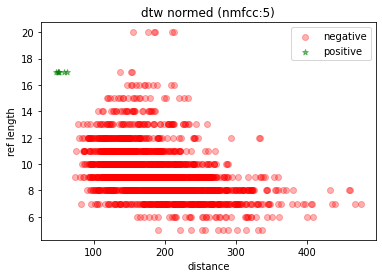

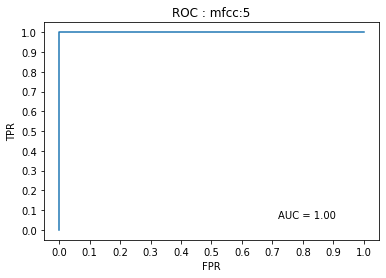

nfeat 5
fpr___ tpr___ threshold
0.0000 1.0000 62.1168
1.0000 1.0000 475.4191


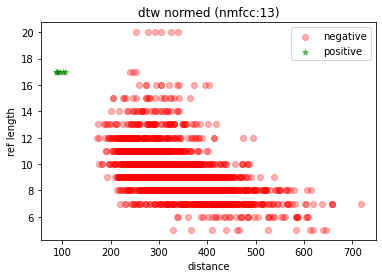

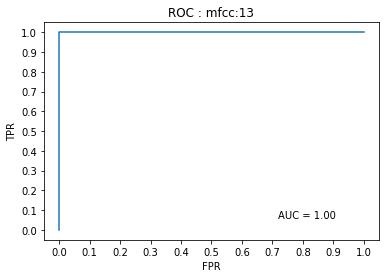

nfeat 13
fpr___ tpr___ threshold
0.0000 1.0000 106.1195
1.0000 1.0000 717.2682


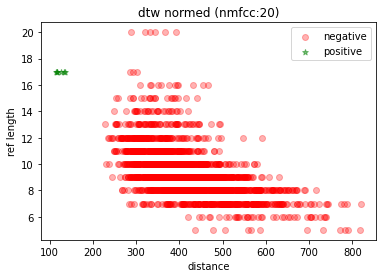

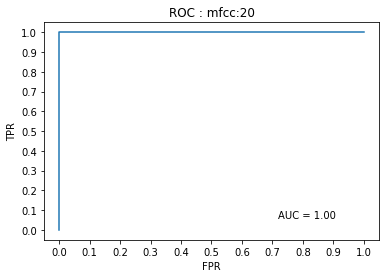

nfeat 20
fpr___ tpr___ threshold
0.0000 1.0000 136.0211
1.0000 1.0000 818.9670


In [331]:
# print('help')
for nfeat in [5, 13, 20]:
# for nfeat in range(5,14):

  
  df = raw_df[ (raw_df['nmfcc'] == nfeat ) & raw_df['query'].apply(lambda x : True if 'help' in x else False)]
  
  x = df['dist']
  y = df['ref_len']
  
  fpr, tpr, thresholds  = metrics.roc_curve(df['label'].to_list(), -x)

  plt.scatter(x[(df['label'] == 0)].to_list(), y[(df['label'] == 0)].to_list(), color='red', label='negative', alpha=0.3)
  plt.scatter(x[(df['label'] == 1)].to_list(), y[(df['label'] == 1)].to_list(), marker='*', color='green', label='positive', alpha=0.5)

  plt.title(f'dtw normed (nmfcc:{nfeat})')
  plt.xlabel('distance')
  plt.ylabel('ref length')
  plt.legend()
  plt.show()
  
  fpr, tpr, thresholds  = metrics.roc_curve(df['label'].to_list(), -x)
  plt.xlabel("FPR")
  plt.ylabel('TPR')
  plt.plot(fpr, tpr)
  plt.annotate("AUC = {:.2f}".format(metrics.auc(fpr, tpr)), xy=(0.7, 0.10), xycoords='axes fraction')
  plt.title(f'ROC : mfcc:{nfeat}')
  plt.xticks(np.arange(0,1.1,0.1))
  plt.yticks(np.arange(0,1.1,0.1))
  plt.show()
  
  print("nfeat", nfeat)
  print('fpr___ tpr___ threshold')
  for i in range(len(fpr)):
    if(fpr[i] >= 0.03):
      print("{:.4f} {:.4f} {:.4f}".format(fpr[i-1], tpr[i-1], -thresholds[i-1]))
      print("{:.4f} {:.4f} {:.4f}".format(fpr[i], tpr[i], -thresholds[i]))
#     if(fpr[i] >= 0.1):
    if(fpr[i] >= 0.05):
      break

help


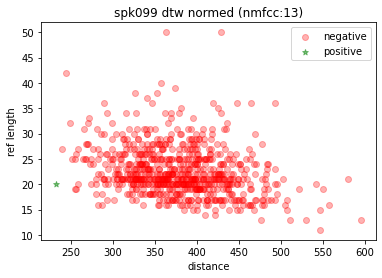

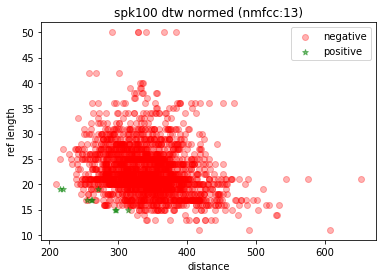

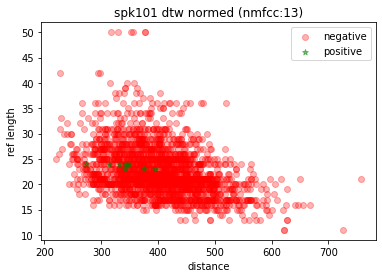

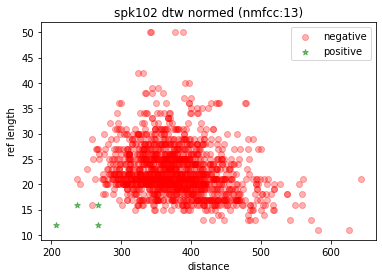

In [58]:
print('help')
# plt.figure(figsize=(25, 70))

for nfeat in [13]:
  
  df = raw_df[ (raw_df['nmfcc'] == nfeat ) ]
  
  x = df['dist']
  y = df['ref_len']
  

  for i, spk in enumerate(["spk099","spk100","spk101","spk102"]):
#   for spk in spk_list:
#     plt.subplot(13,5,((nfeat-1)*5) + i+1 )

    sel_spk = df["query"].apply(lambda x: spk in x)   
    plt.scatter(x[(df['label'] == 0) & sel_spk].to_list(), y[(df['label'] == 0) & sel_spk].to_list(), color='red', label='negative', alpha=0.3)
    plt.scatter(x[(df['label'] == 1) & sel_spk].to_list(), y[(df['label'] == 1) & sel_spk].to_list(), marker='*', color='green', label='positive', alpha=0.5)

    plt.title(f'{spk} dtw normed (nmfcc:{nfeat})')
    plt.xlabel('distance')
    plt.ylabel('ref length')
    plt.legend()
    plt.show()

  
#   plt.subplot(13,5, nfeat*5)
#   fpr, tpr, thresholds  = metrics.roc_curve(df['label'].to_list(), -x)
#   plt.plot(fpr, tpr)
#   plt.annotate("AUC = {:.2f}".format(metrics.auc(fpr, tpr)), xy=(0.7, 0.10), xycoords='axes fraction')
#   plt.title(f'ROC : mfcc:{nfeat}')
#   plt.xticks(np.arange(0,1.1,0.1))
#   plt.yticks(np.arange(0,1.1,0.1))
#   plt.grid(alpha=0.5)
#   plt.show()
# plt.savefig('roc.pdf', bbox_inches='tight')

help


ValueError: y_true takes value in {} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

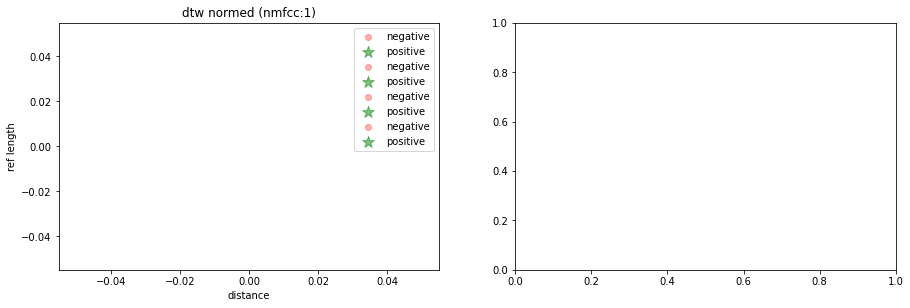

In [12]:
print('help')
plt.figure(figsize=(15, 70))

for nfeat in range(1,14):
  
  df = raw_df[ (raw_df['nmfcc'] == nfeat ) & raw_df['query'].apply(lambda x : True if 'help' in x else False)]
  
  x = df['dist']
  y = df['ref_len']
  
  
  plt.subplot(13,2,nfeat*2-1)
  for i, spk in enumerate(["spk099","spk100","spk101","spk102"]):
#     plt.subplot(13,5,((nfeat-1)*5) + i+1 )


    sel_spk = df["ref"].apply(lambda x: spk in x)   
    plt.scatter(x[(df['label'] == 0) & sel_spk].to_list(), y[(df['label'] == 0) & sel_spk].to_list(), color='red', label='negative', alpha=0.3)
    plt.scatter(x[(df['label'] == 1) & sel_spk].to_list(), y[(df['label'] == 1) & sel_spk].to_list(), marker='*', color='green', label='positive', alpha=0.5, s=150)

  plt.title(f'dtw normed (nmfcc:{nfeat})')
  plt.xlabel('distance')
  plt.ylabel('ref length')
  plt.legend()

  
#   plt.subplot(13,5, nfeat*5)
  plt.subplot(13,2,nfeat*2)
  fpr, tpr, thresholds  = metrics.roc_curve(df['label'].to_list(), -x)
  plt.plot(fpr, tpr)
  plt.annotate("AUC = {:.2f}".format(metrics.auc(fpr, tpr)), xy=(0.7, 0.10), xycoords='axes fraction')
  plt.title(f'ROC : mfcc:{nfeat}')
  plt.xticks(np.arange(0,1.1,0.1))
  plt.yticks(np.arange(0,1.1,0.1))

  plt.grid(alpha=0.5)
#   plt.show()
# plt.savefig('roc.pdf', bbox_inches='tight')

help


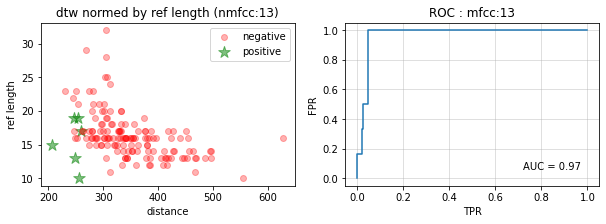

In [54]:
print('help')
plt.figure(figsize=(10, 3))

for nfeat in range(13,14):
  
  df = raw_df[ (raw_df['nmfcc'] == nfeat ) & raw_df['query'].apply(lambda x : True if 'help' in x else False)]
  
  x = df['dist']
  y = df['ref_len']
  
  
  plt.subplot(1,2,1)
  for i, spk in enumerate(["spk099","spk100","spk101","spk102"]):
#     plt.subplot(13,5,((nfeat-1)*5) + i+1 )


    sel_spk = df["ref"].apply(lambda x: spk in x)
    if(i == 0):
      plt.scatter(x[(df['label'] == 0) & sel_spk].to_list(), y[(df['label'] == 0) & sel_spk].to_list(), color='red', label='negative', alpha=0.3)
      plt.scatter(x[(df['label'] == 1) & sel_spk].to_list(), y[(df['label'] == 1) & sel_spk].to_list(), marker='*', color='green', label='positive', alpha=0.5, s=150)
    else:
      plt.scatter(x[(df['label'] == 0) & sel_spk].to_list(), y[(df['label'] == 0) & sel_spk].to_list(), color='red', alpha=0.3)
      plt.scatter(x[(df['label'] == 1) & sel_spk].to_list(), y[(df['label'] == 1) & sel_spk].to_list(), marker='*', color='green', alpha=0.5, s=150)

  plt.title(f'dtw normed by ref length (nmfcc:{nfeat})')
  plt.xlabel('distance')
  plt.ylabel('ref length')
  plt.legend()

  
#   plt.subplot(13,5, nfeat*5)
  plt.subplot(1,2,2)
  fpr, tpr, thresholds  = metrics.roc_curve(df['label'].to_list(), -x)
  plt.plot(fpr, tpr)
  plt.annotate("AUC = {:.2f}".format(metrics.auc(fpr, tpr)), xy=(0.7, 0.10), xycoords='axes fraction')
  plt.title(f'ROC : mfcc:{nfeat}')
#   plt.xticks(np.arange(0,1.1,0.1))
#   plt.yticks(np.arange(0,1.1,0.1))
  plt.xlabel('TPR')
  plt.ylabel("FPR")

  plt.grid(alpha=0.5)
#   plt.show()
# plt.savefig('roc_13.png', bbox_inches='tight')

help


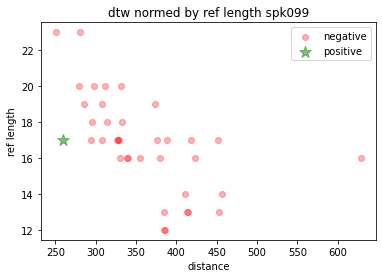

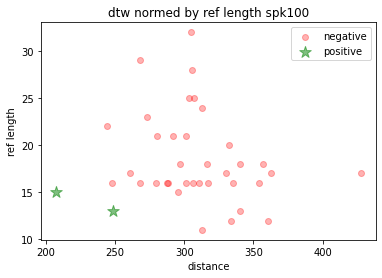

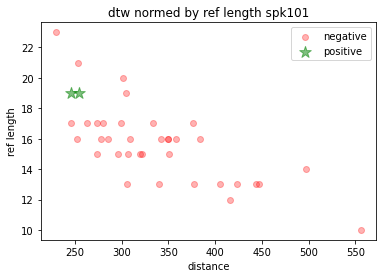

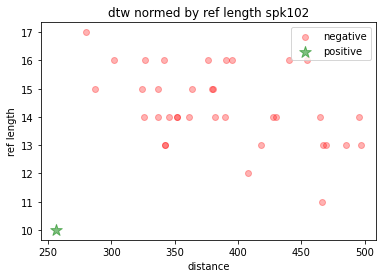

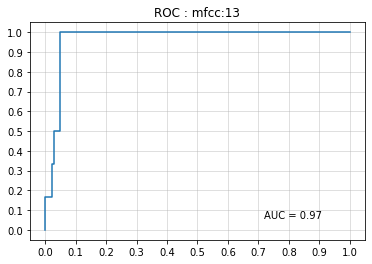

In [48]:
print('help')
# plt.figure(figsize=(10, 3))

for nfeat in range(13,14):
  
  df = raw_df[ (raw_df['nmfcc'] == nfeat ) & raw_df['query'].apply(lambda x : True if 'help' in x else False)]
  
  x = df['dist']
  y = df['ref_len']
  
  
#   plt.subplot(1,2,1)
  for i, spk in enumerate(["spk099","spk100","spk101","spk102"]):
#     plt.subplot(1,5,((nfeat-1)*5) + i+1 )


    sel_spk = df["ref"].apply(lambda x: spk in x)
    plt.scatter(x[(df['label'] == 0) & sel_spk].to_list(), y[(df['label'] == 0) & sel_spk].to_list(), color='red', label='negative', alpha=0.3)
    plt.scatter(x[(df['label'] == 1) & sel_spk].to_list(), y[(df['label'] == 1) & sel_spk].to_list(), marker='*', color='green', label='positive', alpha=0.5, s=150)
      

    plt.title(f'dtw normed by ref length {spk}')
    plt.xlabel('distance')
    plt.ylabel('ref length')
    plt.legend()
    plt.show()

  
#   plt.subplot(13,5, nfeat*5)
#   plt.subplot(1,2,2)
  fpr, tpr, thresholds  = metrics.roc_curve(df['label'].to_list(), -x)
  plt.plot(fpr, tpr)
  plt.annotate("AUC = {:.2f}".format(metrics.auc(fpr, tpr)), xy=(0.7, 0.10), xycoords='axes fraction')
  plt.title(f'ROC : mfcc:{nfeat}')
  plt.xticks(np.arange(0,1.1,0.1))
  plt.yticks(np.arange(0,1.1,0.1))

  plt.grid(alpha=0.5)
  plt.show()
# plt.savefig('roc_13.png', bbox_inches='tight')